### Importing Libraries 

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore") 

### Importing data 

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data = train_data[:8000]
test_data = test_data[:2000]
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"] # from website
y_train, X_train = train_data.iloc[:, 0].values, train_data.iloc[:, 1:].values
y_test, X_test = test_data.iloc[:, 0].values, test_data.iloc[:, 1:].values


X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)




### Visualizing Pre Normalization

(8000, 784) (8000,)


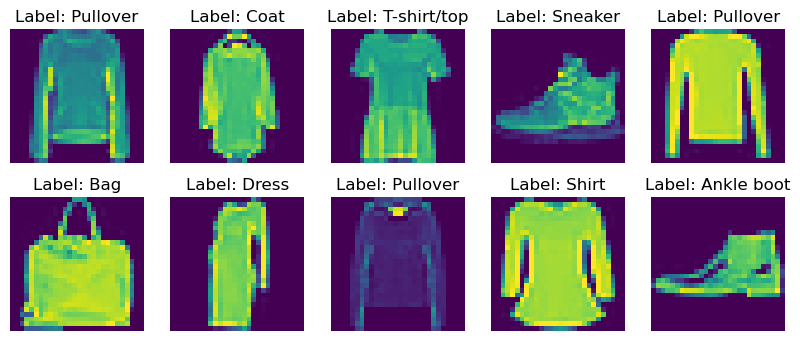

In [54]:
print(X_train.shape, y_train.shape)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28))  
    ax.set_title(f"Label: {labels[y_test[i]]}")
    ax.axis('off')

### normalization

In [55]:
# normalize data by dividing by 255
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0



### Visualization post Normalization

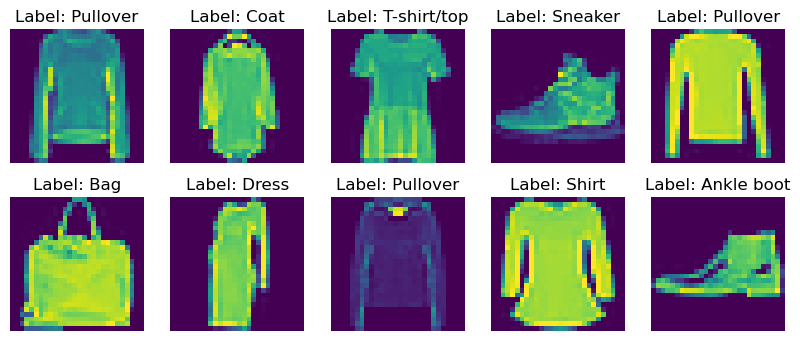

In [56]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28))  
    ax.set_title(f"Label: {labels[y_test[i]]}")
    ax.axis('off')

### Part 2 training on all 4 activations

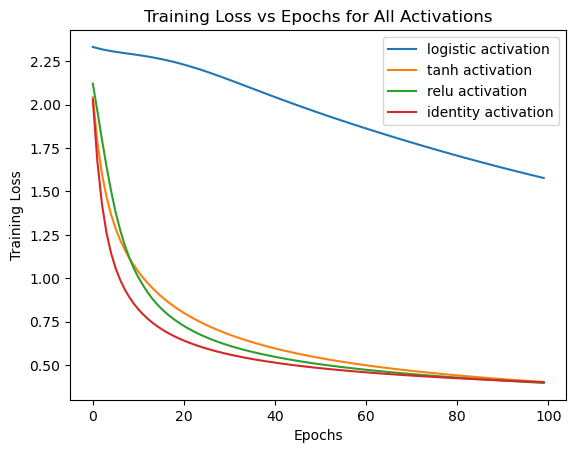

In [57]:
activations = ['logistic', 'tanh', 'relu', 'identity']
results = {}
for activation in activations:
    model = MLPClassifier(hidden_layer_sizes=[128, 64, 32],activation=activation,solver='adam',learning_rate_init=2e-5,batch_size=128,max_iter=1,random_state=42)
    train_loss = []
    val_loss = []
    train_acc = []
    val_acc = []
    for i in range(100):
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        train_loss.append(log_loss(y_train, model.predict_proba(X_train)))
        val_loss.append(log_loss(y_val, model.predict_proba(X_val)))
        train_acc.append(model.score(X_train, y_train))
        val_acc.append(model.score(X_val, y_val))
    results[activation] = {'train_loss': train_loss, 'val_loss': val_loss, 'train_acc': train_acc, 'val_acc': val_acc}


for activation in activations:
    plt.plot(results[activation]['train_loss'], label=f'{activation} activation')
plt.title("Training Loss vs Epochs for All Activations")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()



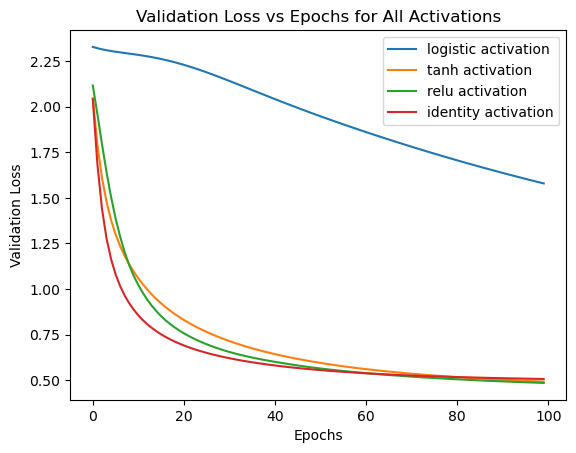

Final Validation Loss for logistic activation: 1.578670739945209
Final Validation Accuracy for logistic activation: 0.453

Final Training Loss for logistic activation: 1.5777408594181648
Final Training Accuracy for logistic activation: 0.46525

Final Validation Loss for tanh activation: 0.49315907684995736
Final Validation Accuracy for tanh activation: 0.835

Final Training Loss for tanh activation: 0.40333697780394856
Final Training Accuracy for tanh activation: 0.870875

Final Validation Loss for relu activation: 0.485841451331661
Final Validation Accuracy for relu activation: 0.837

Final Training Loss for relu activation: 0.39808792614481253
Final Training Accuracy for relu activation: 0.8695

Final Validation Loss for identity activation: 0.5074941956041475
Final Validation Accuracy for identity activation: 0.826

Final Training Loss for identity activation: 0.4021107090407795
Final Training Accuracy for identity activation: 0.867375



In [58]:

for activation in activations:
    plt.plot(results[activation]['val_loss'], label=f'{activation} activation')
plt.title("Validation Loss vs Epochs for All Activations")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

for activation in activations:
    print(f"Final Validation Loss for {activation} activation: {results[activation]['val_loss'][-1]}")
    print(f"Final Validation Accuracy for {activation} activation: {results[activation]['val_acc'][-1]}")
    print()
    print(f"Final Training Loss for {activation} activation: {results[activation]['train_loss'][-1]}")
    print(f"Final Training Accuracy for {activation} activation: {results[activation]['train_acc'][-1]}")
    print()

### Performing grid search on TanH

In [ ]:

params = {
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [2e-1,2e-3, 2e-5, 2e-7],
    'batch_size': [64, 128, 256]
}
gs = GridSearchCV(MLPClassifier(hidden_layer_sizes=[128,64,32],activation='relu', max_iter=100),params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

print("Best parameters from grid search:", gs.best_params_)


Best parameters from grid search: {'batch_size': 256, 'learning_rate_init': 0.002, 'solver': 'adam'}


### Training the regressors when layers are strictly decreasing then strictly increasing smallest layer is 10

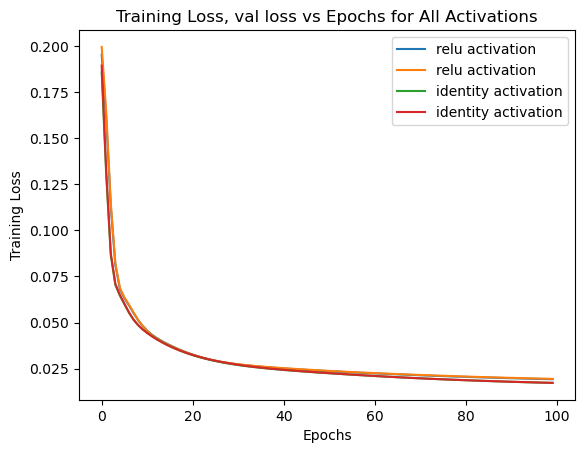

In [ ]:
activations = ['relu', 'identity']
regressors = {}
objects = {}    
for i in activations:
    reg = MLPRegressor(hidden_layer_sizes=[512, 128, 32, 128, 512],activation=i,solver='adam',learning_rate_init=2e-5,max_iter=1,random_state=42)
    val_loss = []
    val_acc = []
    train_loss = []
    train_acc = []
    for j in range(100):
        reg.partial_fit(X_train, X_train)
        train_loss.append(mean_squared_error(X_train, reg.predict(X_train)))
        val_loss.append(mean_squared_error(X_val, reg.predict(X_val)))
        train_acc.append(reg.score(X_train, X_train))
        val_acc.append(reg.score(X_val, X_val))
    regressors[i] = {'train_loss': train_loss, 'val_loss': val_loss, 'train_acc': train_acc, 'val_acc': val_acc}
    objects[i] = reg


        


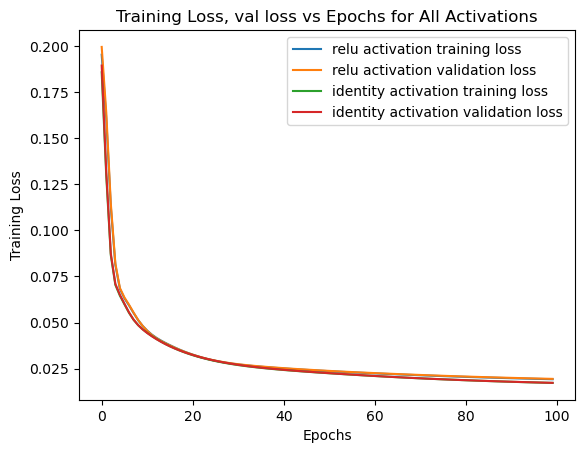

In [67]:
for i in activations:
    plt.plot(regressors[i]['train_loss'], label=f'{i} activation training loss')
    plt.plot(regressors[i]['val_loss'], label=f'{i} activation validation loss')
plt.title("Training Loss, val loss vs Epochs for All Activations")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()


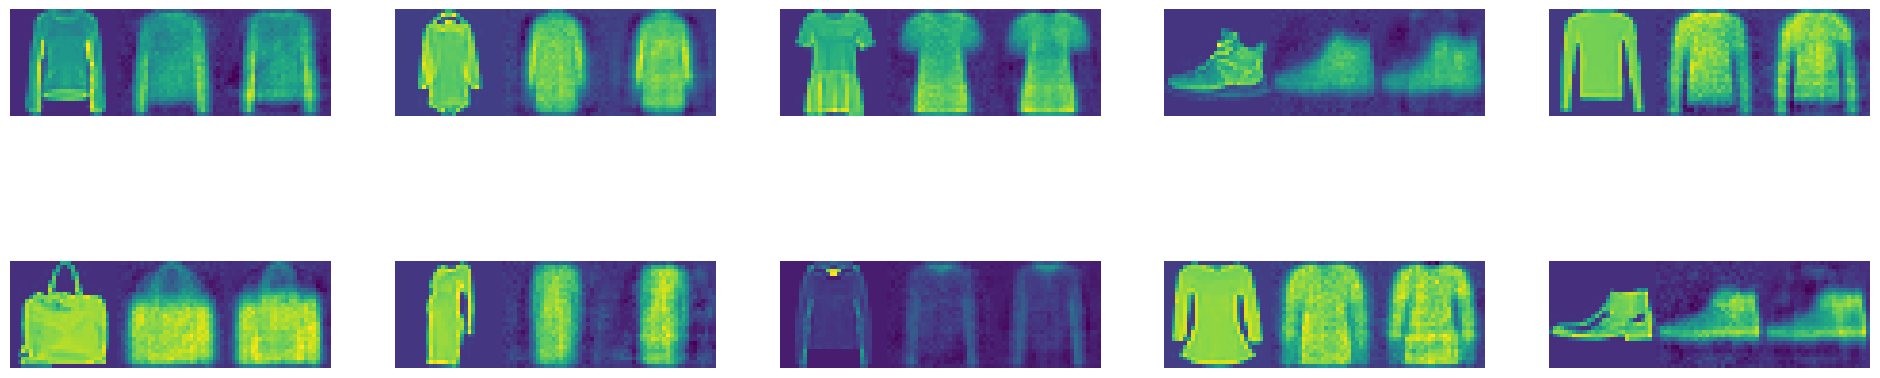

In [65]:
fig, axes = plt.subplots(2, 5, figsize=(24, 6))
for i, ax in enumerate(axes.flat):
    original = X_test[i].reshape(28, 28)
    regenerated = objects['relu'].predict(X_test[i].reshape(1, -1)).reshape(28, 28)
    regenerated_identity = objects['identity'].predict(X_test[i].reshape(1, -1)).reshape(28, 28)
    ax.imshow(np.concatenate((original, regenerated,regenerated_identity), axis=1))
    ax.axis('off')
plt.show()

### Make the X train and test pass through the 3 layers of the network and then using those features to train a new mlp classifier 

In [ ]:

features_relu = objects['relu'].coefs_
intercepts_relu = objects['relu'].intercepts_
features_identity = objects['identity'].coefs_
intercepts_identity = objects['identity'].intercepts_

X_train_relu = X_train
X_train_identity = X_train
 
for i in range(3):
    X_train_relu = np.maximum(0, np.dot(X_train_relu, features_relu[i]) + intercepts_relu[i])
    X_train_identity =  np.dot(X_train_identity, features_identity[i] )+ intercepts_identity[i]
print(X_train_relu.shape) 
print(X_train_identity.shape)

X_test_relu = X_test
X_test_identity = X_test

for i in range(3):
    X_test_relu = np.maximum(0, np.dot(X_test_relu, features_relu[i]) + intercepts_relu[i])
    X_test_identity =  np.dot(X_test_identity, features_identity[i]) + intercepts_identity[i]

print(X_test_relu.shape)
print(X_test_identity.shape)
model_relu = MLPClassifier(hidden_layer_sizes=[128,64, 32],activation='relu',solver='adam',learning_rate_init=2e-5,batch_size=128,max_iter=200,random_state=42)

model_identity = MLPClassifier(hidden_layer_sizes=[128, 64, 32],activation='relu',solver='adam',learning_rate_init=2e-5,batch_size=128,max_iter=200,random_state=42)

model_relu.fit(X_train_relu, y_train)
model_identity.fit(X_train_identity, y_train)
accuracy_relu = model_relu.score(X_test_relu, y_test)
accuracy_identity = model_identity.score(X_test_identity, y_test)

print(f"Accuracy for the new classifier using features from the 'relu' regressor: {accuracy_relu}")
print(f"Accuracy for the new classifier using features from the 'identity' regressor: {accuracy_identity}")

(8000, 32)
(8000, 32)
(1000, 32)
(1000, 32)
Accuracy for the new classifier using features from the 'relu' regressor: 0.791
Accuracy for the new classifier using features from the 'identity' regressor: 0.817


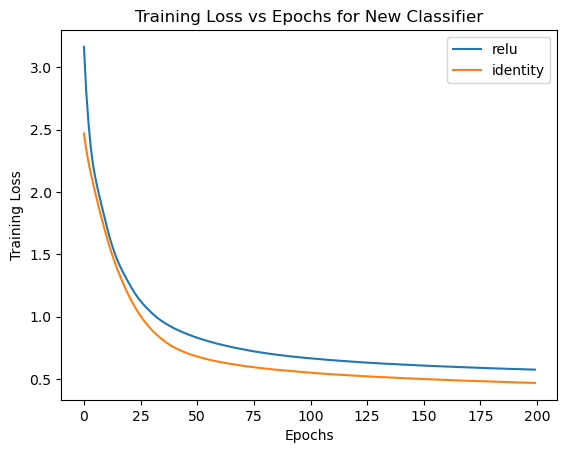

In [ ]:
plt.plot(model_relu.loss_curve_, label='relu')
plt.plot(model_identity.loss_curve_, label='identity')
plt.title("Training Loss vs Epochs for New Classifier")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()


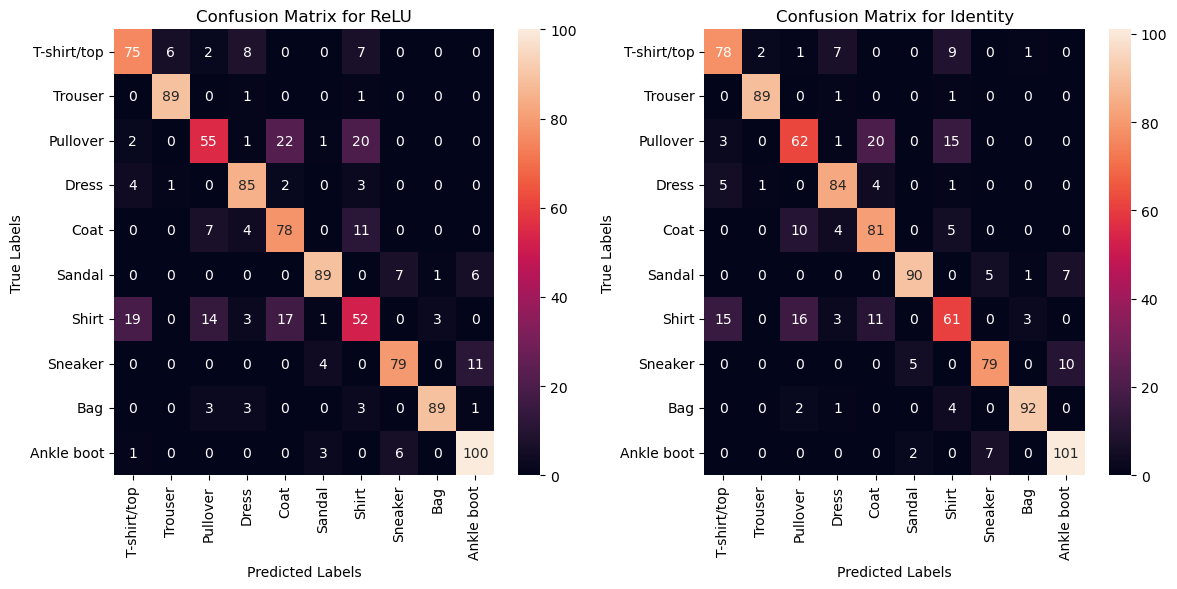

In [ ]:
ypr = model_relu.predict(X_test_relu)
ypi = model_identity.predict(X_test_identity)
cmr = confusion_matrix(y_test, ypr)
cmi = confusion_matrix(y_test, ypi)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cmr, annot=True, fmt='d', ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title("Confusion Matrix for ReLU")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
sns.heatmap(cmi, annot=True, fmt='d', ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title("Confusion Matrix for Identity")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()
